In [12]:
from helpers.check_stationarity import check_stationarity
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt

## Pruebas de Estacionariedad

A modo de introducción, la estacionariedad de una proceso indica que sus propiedades estadísticas no cambian con el tiempo. Dicha estacionariedad puede ser fuerte o débil, dependiendo de lo que se tenga en cuenta para determinarla. La estacionariedad fuerte requiere que la distribución de una subsecuencia finita de variables aleatorias del proceso siga siendo la misma a medida que se la desplaza a lo largo del tiempo. Por su parte, la estacionariedad débil solo requiere que la media y la varianza de la subsecuencia de variables entre dos puntos temporales cualesquiera, t y t-k, dependan sólo de k, la diferencia entre los dos momentos, y no de la ubicación de los puntos a lo largo del eje temporal.


Existen distintos métodos para comprobar si una serie temporal es estacionaria o no estacionaria. Algunos de estos se utilizan para realizar un análisis rápido que permita descartar estacionariedad. Entre ellos se encuentran el análisis visual de la serie y el resumen estadístico de los datos. Mediante el análisis visual un invididuo podría buscar tendencias y estacionalidades que permitan detectar rápidamente la no estacionariedad. Por otro lado, el resumen estadístico permite comparar la media y la varianza de distintos grupos de datos y detectar si existen diferencias. Por último, las pruebas estadísticas, el método más formal, permiten informar el grado en que se puede rechazar o no una hipótesis nula.




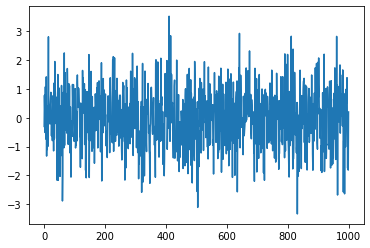

In [13]:
## Generación de señal estacionaria
y_est = np.random.normal(0, 1, 1000) # Media 0, varianza 1. Ruido Gaussiano.
plt.plot(y_est)

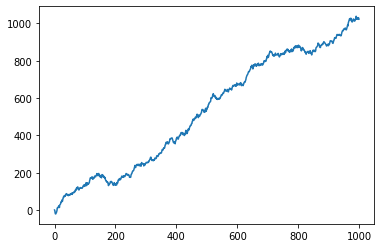

In [14]:
## Generación de señal no estacionaria
y_0 = 0
y_noest = [y_0]

for i in range(1,1000):
    y_noest.append(y_noest[i-1]+np.random.normal(1,5))

plt.plot(y_noest)

## Prueba de raíz unitaria

Las pruebas de raíz unitaria son un tipo de prueba estadística que determinan la fuerza con la que una serie temporal está definida por una tendencia.

La hipótesis nula de estas pruebas es que la serie temporal puede ser representada por una raíz unitaria, significando que no es estacionaria. La hipótesis alternativa es que la serie temporal es estacionaria.

El resultado obtenido de estas pruebas se interpreta utilizando el valor-p y un umbral. En los casos en que el valor-p se encuentre por debajo del umbral, típicamente de 5% o 1%, la prueba sugiere rechazar la hipótesis nula, indicando que se trataría de una serie estacionaria. Por el contrario, un valor por encima del umbral permite aceptar la hipótesis nula comprobando la no-estacionariedad de la serie.


 Dentro de las pruebas de raíz unitaria se encuentran distintas opciones.

### Dickey-Fuller

La prueba de la raíz unitaria Dickey-Fuller tiene una ecuación de prueba y una estadística sencillas, pero este método no es utilizado comunmente. La razón es que la prueba DF supone que el término de error es ruido blanco, mientras que la mayoría de términos de error en la práctica están autocorrelacionados. Esta prueba solo es válida si la serie temporal está bien caracterizada por un AR(1) con errores de ruido blanco.


### Dickey-Fuller Aumentada

La prueba de Dickey-Fuller Aumentada es uno de los métodos más utilizados. A diferencia de la Dickey-Fuller tradicional, es válida en modelos generales ARMA(p, q) con órdenes desconocidos.


In [15]:
from statsmodels.tsa.stattools import adfuller

#### Ejemplo con serie estacionaria.

In [16]:
t_stat, p_value, _, _, critical_values, _  = adfuller(y_est)
check_stationarity(p_value=p_value)

p-value: 0.00
p-threshold: 0.05
=> Serie Estacionaria


El p-value, en módulo, resulta mayor que los módulos de los valores críticos definidos por los umbrales. Por esta razón, se puede descartar la hipótesis nula, comprobando la estacionariedad de la serie.

#### Ejemplo con serie no estacionaria.

In [17]:
t_stat, p_value, _, _, critical_values, _ = adfuller(y_noest)
check_stationarity(p_value=p_value)

p-value: 0.88
p-threshold: 0.05
=> Serie No Estacionaria


En este caso, el módulo del p-value es menor que los módulos de todos los valores críticos definidos por los umbrales. Por esta razón, no se puede descartar la hipótesis nula y comprueba la no estacionariedad de la serie.

### Phillips-Perron

La prueba de Phillips-Perron es otro tipo de prueba de raíz unitaria. Su hipótesis nula consisten en que el orden de integración de la serie sea igual a 1. Sin embargo, se comprobó que esta serie funciona peor que la prueba Dickey-Fuller Aumentada en series finitas.

#### Ejemplo con serie estacionaria

In [18]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(y_est)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.319
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


El p-value menor al threshold (0.05) indica que podemos rechazar la hipótesis nula y el proceso resulta estacionario.

#### Ejemplo con serie no estacionaria

In [19]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(y_noest)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.562
P-value                         0.879
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


El p-value mayor al threshold (0.05) indica que no podemos rechazar la hipótesis nula y el proceso resultaría no estacionario.

### Kwiatkowski-Phillips-Schmidt-Shin

En la prueba KPSS la hipótesis nula corresponde a la estacionariedad de la serie o de su tendencia, por lo cual no es considerada una prueba de raíz unitaria. A diferencia de la mayoría de las pruebas, la presencia de una raíz unitaria no es la hipótesis nula sino la alternativa.

In [20]:
from statsmodels.tsa.stattools import kpss

#### Ejemplo con serie estacionaria

In [21]:

t_stat, p_value, _, critical_values = kpss(y_est)
check_stationarity(p_value=p_value, type='kpss')


p-value: 0.10
p-threshold: 0.05
=> Serie Estacionaria


#### Ejemplo con serie no estacionaria

In [22]:
t_stat, p_value, _, critical_values = kpss(y_noest)
check_stationarity(p_value=p_value, type='kpss')

p-value: 0.01
p-threshold: 0.05
=> Serie No Estacionaria
